## Task 1 : Import data into Python Environment

### Step 1 : Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

### Step 2 : Import the CSV file

In [2]:
with zipfile.ZipFile('1568699544_comcast_telecom_complaints_data.zip','r') as zip_ref:
    zip_ref.extractall('Project 04 - Comcast Telecom Consumer Complaints')

In [3]:
comcast = pd.read_csv("Project 04 - Comcast Telecom Consumer Complaints/Comcast_telecom_complaints_data.csv",parse_dates=['Date'])
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.drop(columns=['Ticket #','Date_month_year','Zip code'])

,Customer Complaint,Date,Time,Received Via,City,State,Status,Filing on Behalf of Someone
0,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes
4,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,Solved,No
...,...,...,...,...,...,...,...,...
2219,Service Availability,2015-04-02,9:13:18 AM,Customer Care Call,Youngstown,Florida,Closed,No
2220,Comcast Monthly Billing for Returned Modem,2015-06-02,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,Solved,No
2221,complaint about comcast,2015-06-09,5:28:41 PM,Internet,Ypsilanti,Michigan,Solved,No
2222,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,Solved,No


In [5]:
comcast.shape

(2224, 11)

In [6]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

## Task 2 : Provide the trend chart for the number of complaints at monthly and daily granularity levels

### plot a bar graph of customer complaints vs date

In [8]:
comcast['Month'] = pd.DatetimeIndex(comcast['Date']).month
comcast['Month'].head()

0    4
1    4
2    4
3    5
4    5
Name: Month, dtype: int64

In [9]:
comcast['Month str'] = comcast['Date'].dt.strftime('%B')
comcast['Month str'].head()

0    April
1    April
2    April
3      May
4      May
Name: Month str, dtype: object

In [10]:
comcast['Month str'].value_counts()

June     1280
April     545
May       399
Name: Month str, dtype: int64

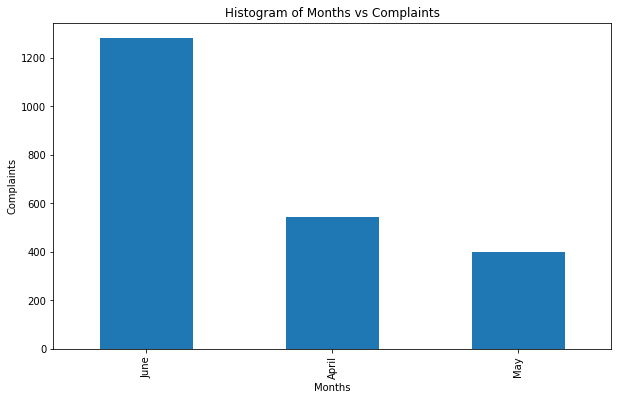

In [11]:
(comcast['Month str'].value_counts()).plot(kind='bar',figsize=(10,6))
plt.xlabel('Months')
plt.ylabel('Complaints')
plt.title('Histogram of Months vs Complaints')
plt.show()

In [12]:
comcast['Day'] = pd.DatetimeIndex(comcast['Date']).day
comcast['Day'].head()

0    22
1     8
2    18
3     7
4    26
Name: Day, dtype: int64

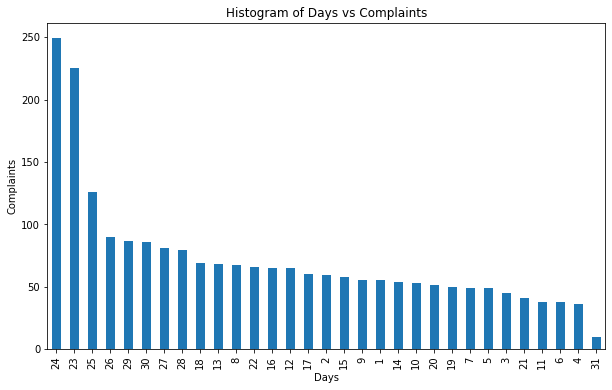

In [13]:
(comcast['Day'].value_counts()).plot(kind='bar',figsize=(10,6))
plt.xlabel('Days')
plt.ylabel('Complaints')
plt.title('Histogram of Days vs Complaints')
plt.show()

## Task 3 : Provide a table with the frequency of complaint types

### Subtask 1 : Which complaint types are maximum i.e., around internet, network issues, or across any other domains

In [14]:
comcast['Customer Complaint'].value_counts()

Comcast                                                           83
Comcast Internet                                                  18
Comcast Data Cap                                                  17
comcast                                                           13
Comcast Billing                                                   11
                                                                  ..
Xfinity Data Cap                                                   1
Paying for service for 12 months without recieving the service     1
Cap on Comcast Data                                                1
Data usage with Comcast                                            1
Internet issues and Customer Service issues                        1
Name: Customer Complaint, Length: 1841, dtype: int64

In [15]:
categories_to_combine1 = ['(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!','Comcast Dishonest Marketing Scheme','Comcast fradulent Marketing and billing for internet','Second Complaint "Comcast not honoring Marketing Materials"']
for tel in categories_to_combine1:
 comcast['Customer Complaint'].replace({tel:'Telemarketing'},inplace = True)

In [16]:
categories_to_combine2 = ["Comcast Imposed a New Usage Cap of 300GB that punishes streaming.","Throttling service and unreasonable data caps","Comcast data caps","Comcast Internet Data Cap","Comcast using a Data Cap to take however much money they like","Comcast Data Cap","Comcast's Monopolistic Practices and Data Capping","Comcast data cap ""trials""","Legality of data caps","Data caps","Comcast data cap","Data Caps","comcast data cap","Comcast bandwidth data caps in Atlanta, GA","Comcast download caps","Data Cap","Data cap","Comcast Atlanta Data Caps","Comcast Atlanta Data Caps","Comcast Data Cap","Comcast data caps","Comcast Data Caps","Bandwidth Caps becoming excessive","Comast data cap","Data Usage Cap Maine","Residentail Broadband Data Caps","Comcast data cap","Comcast Usage Caps","Comcast Data Usage Caps","Data Caps and the Extortion Methods of Comcast","Data Caps","comcast data cap","Comcast Internet Data Cap LIES","Comcast Internet Usage Cap","Comcast Corporation Data Caps","Comcast Data Cap","Comcast data cap at 300GB","COMCAST THROTTLING SPEEDS AND DATA CAPS","Closed Captioning of Online Videos","Comcast data caps","Comcast Data Caps","Monopoly and Deceit: The 300GB Data Cap","Comcast Data Cap in Atlanta, GA","Cap on data usage","Data Cap","Comcast Selectively Enforcing Data Caps","Comcast Usage Caps","Comcast / Xfinity overcharging for internet / internet cap","Comcast Money Grab using Data Caps","Comcast Data Cap Compliant","Comcast Data Cap Limits, Lack of Competition, and Anti-Competition Business and Billing Practices","Billing/contract issue related to data cap","Data Caps","Comcast data cap","Comcast Refuses to Fix Billing If a Virus Causes Data Usage Over Cap on a system protected by THEIR AV","300 gb cap","Comcast Data Caps","Comcast trial of putting cap (300 GB / month) on internet usage.","Comcast Data Caps","Comcast Data Cap & Code Injection","Data Caps","Please stop Broadband bandwidth caps","Data cap","ISP Data Cap","Internet cap","Comcast Data Cap","Comcast Data Caps","Comcast data cap","monthly data caps","300GB/month Data Cap","Data Caps","Data Cap overages","Data Caps","Comcast Data Cap","Comcast Data Usage Cap/Limit","Comcast data caps","Comcast Data Usage Cap","comcast data useage caps and charges","Comcast Data Caps","Data Cap","Comcast's data caps are anti-consumer.","Xfinity Data Cap","Data caps & Monthly prices","Comcast Data Cap","Comcast Data Cap of 300GB","Data Cap","Comcast data cap / interference with free market","Data Caps by Comcast","Comcast Data Caps","Comcast data caps","Comcast data caps","Comcast home data usage cap","Bandwidth Caps.","Comcast Data Cap","Comcast Data Caps","Data soft cap and charges from Comcast","Comcast Speed and Cap misinformation","Comcast Data Caps for Home Internet Service","Comcast monthly data usage cap","Comcast Data Use Caps","Data Caps",
                          "Forced data capping","Comcast Data Cap","Data cap","Comcast Data Cap","Data Caps","Data caps","Comcast data cap","Comcast Data Cap","Comcast Data cap","Data Caps Discourage Commerce","300GB/month data cap 'trial' for several years now","Comcast data usage cap","Comcast Data Caps","Data Cap imposed without notice","Comcast 300GB data cap","Comcast 300Gb Data Cap","Datacaps","Comcast data caps","Comcast data cap limit","Comcast data caps","Stop the data caps of Comcast","Comcast Data Cap","Comcast Data Cap","Data cap","Data Cap 300gb","COMCAST DATA CAP IS BULLCRAP","Comcast Data Cap","Cap on Comcast Data","Comcast Data Cap","Comcast's Data Cap","Comcast is limiting my access to data by using ""Data Caps""","Comcast data cap","Comcast data caps in currently uncompetitive Nashville market","comcast data cap","Comcast data usage cap","Comcast - Internet Data Cap","Data Cap Overages","Comcast data caps are killing the internet","Data Cap in Olive Branch MS with Comcast","Data Cap","Comcast Internet Data Cap Segregation","Data Cap Limitations","Data Cap problems","Surprise Data Caps from Comcast","Comcast Data Cap","Stop The CAP","expensive service, capped","Comcast Internet Data Cap","Comcast DATA Caps","Comcast Data usage caps","Data caps and monthly fees","Comcast data caps are an end-run around Net Neutrality","Comcast Data Cap","Data Cap on Internet Downloads?","Comcast Internet usage caps","Comcast Xfinity Data Cap in Atlanta, GA","Comcast Data Caps","Outrageous billing costs and Data caps","comcast data cap","Comcast/Xfinity Internet Data Cap","Comcast 300GB CAP","Cap complaints","Comcast Data Caps","Comcast data cap","Data Usage Cap","Data Caps","Comcast Data Cap","Comcast data cap","comcast data caps","Data caps for broadband internet","Data capping and lack of options in Tucson AZ","Data Caps","Data Caps","Comcast data cap/meter","Data Cap","Comcast Data Meter/Cap","Tucson Comcast Data Caps on Internet Service","Data Cap","Home Internet Data Caps","Data usage cap with Comcast Xfinity","Xfinity Data Caps","Comcast Data Caps and Throttling","Data Cap","Comcast Data Cap Overage Fees","Data caps for cable ISP;s","data usage caps","Comcast Xfintity Internet Data Caps","comcst data cap","comcast cap","Overage on 300GB data plan with Comcast","Data Usage Overage","Data Limit","Data usage","Data usage limit","Data limit with Comcast","Data usage with Comcast","Data Overages","Data Usage Meter","Data Limits",'Comcast is limiting my access to data by using "Data Caps"','Comcast and their "data limit"','Comcast "Unlimited" Internet Access recently limited to 300GB per month','Internet "Overage" Charges','Comcast data cap "trials"']
for dat in categories_to_combine2:
 comcast['Customer Complaint'].replace({dat:'Data Cap'},inplace = True)

In [17]:
categories_to_combine3 = ["Payment disappear - service got disconnected","Speed and Service","Comcast not working and no service to boot","Comcast refuses to help troubleshoot and correct my service.","Billing after service was asked to be disconnected","Horrible Internet Service","Failure to provide services that I am billed for.","horrible cable service and customer service","Comcast Customer Service","No Service","Comcast Billing and Service Issues","service issues","Comcast Refuses to Schedule a Future Service Stoppage","Comcast - failure to provide service, refusal to void contract","Spotty Comcast service","without service despite willingness to pay","Speed of service","Comcast services/billing issues","Comcast Added Service After I Declined It","Cable service and telephone connect not complete","Comcast Won't Cancel My Service","Comcast disconnecting service before due date","Denial of Comcast Business (Phone and internet) Service to my dental practice","Comcast's Terrible Service - How are they still in business?","they are forcing me for my bank account information by suspending my services for no reason (I also feel like they are committing corporate theft).","Comcast discontinuation of service issue","Comcast customer service","Horrible Comcast Customer Service","Bad Customer Service","disconnection of service","Comcast refuses service to my address","Comcast will not let me discuss my bill or service with a representative","no service for 5+ days","COMCAST Poor Customer Service","Comcast internet and cable service","double billing after change of service","Forced Bundling of Internet Service with CATV","Failure to deliver service","Comcast's refusal to recognize written notice of termination of service","Services turned off in retaliation for complaints","Intermittent Service","Paying for high speed internet with Comcast. Consistently getting slow service.","Comcast Monopoly on Packages is costing me more money for same service","Billing Dispute & Poor Customer Service","Internet service slow and intermittent","Comcast Service and customer service representative","Service refusal and lower than advertised speeds.","Connecting the service","Comcast billing after discontinuation of service","constant disruption of internet service","Incorrect Billing and Service from Comcast","Awful Service!","Failure to supply the proper Internet service","Bad Service/drop calls/no support","Comcast Outage/poor service 6/1","COMCAST BILLING FOR LAST @18 mos for services they are unable or unwilling to provide","Comcast slow internet service","lack of service from comcast","credit for service outage 6/23/15","2+ Day Degraded Services","Over paying for my Comcast Services","Fees not disclosed before service was installed","comcast service","Poor customer service","Billed for service never received","disrupted internet service","Have to bundle services to get advertised proce.","Comcast service that didn't work","Internet Service","Issues with Comcast regarding service, billing, etc","difficulty to cancel services before moving","Comcast fails to fulfill request for Internet service","service issues","No internet service","No service","Billing discrepencies and service termination hurdles","West Coast Service Issues - Comcast","Comcast poor service","comcast throttling my internet service","billing/service issues","Complex situation prevents bundling discounts and drives service price up","Terrible customer service and process","Comcast Service and Customer service issues","Comcast is giving me poor quality customer service.","horrible service charges for tech/installation applied when they shouldnt have","Slow Internet/ Billing/ poor customer service of your complaints","no service","comcast: no service for one month","Comcast charging for services not rendered","Double charge my internet service every month","Comcast Billing/Monopoly/Service","Faulty Service and False Advertisement","Comcast/Xfinity Service Manipulation","unsatisfactory speed with disorganized service","Comcast billing and service","Billing/Customer Service","Service outages (Comcast)","Service Issues","very poor customer service","Tried to cancel, was lied to about change in service","COMCAST SERVICE COMPLAINT",
                          "Worst speed, no competition, and billing does not match the service.","Comcast bundled service","Comcast misrepresented their service area, then charged me for attempting to use it.","Comcast Does Not Deliver Service","Comcast service","Comcast service billing","Transfer services","Comcast agent lied about service upgrade","Customer Service Representative Lied About Rates and Promotions","Comcast service Corvallis, OR.","comcast xfinity home security service","Comcast Internet Service Bad Quality","Comcast Internet Service Provider","comcast services","comcast internet service - billing problem","Comcast refusal to cancel service under false contract claims","Terrible Service and Ripped off by Comcast","Comcast secretly raising my bill for services I never agreed to. Again.","Comcast Service for EXTERIOR Line Replacement Billed to customer","Billed without service","no internet service, no on demand service","internet and on demand service","Unfair Charges and substandard service","Comcast service","Comcast Service","Slow Service","Business Class Service","Comcast Internet Service Complaint","Comcast poor service or throttling","No broadband service provided","Poor Service from Comcast","Slow speeds, poor service,.","Billing and Service","Comcast billing/service","Terrible Comcast service","Complaint against Comcast for incredibly bad service","Internet service speed","Comcast Internet Only Service","Overpriced, low quality service","Bundled Service","Comcast customer service and billing complaint","lack of service, Service call complaint","lack of service, Service call complaint","Unreliable service for the past three years","Comcast deceptive selling billing lack of service - SECOND And EXPANDED COMPLAINT","Comcast will not service our home","Comcast Billing and Service Issues","Poor service","Recurring Comcast service issues and long waits for non-service","Comcast Service","Charged for Services not provided","Horrible/Unacceptable Service of Comcast","Comcast/Xfinity Poor Service, Fraudulent Billing and Collection","Nightly service interruption","comcast wont service my address","cannot access my email or service at all","Xfinity/comcast Service","Comcast/Xfinity- Paying for High speed service","Comcast/Xfinity- Paying for High speed service","Comcast Internet Speed/Quality of Service and price","Comcast/Xfinity service","Issues with Comcast Customer Service due to loss of Internet","Comcast Internet Service","Comcast Overcharge for Internet Service for over One Year","Not receiving refund of service from Comcast, for over 90 days","Continues services interruptions causing losses to my business","Comcast blocking services","Billing Issues/Service Issues","Comcast service levels","comcast service overcharge for internet and phone","Comcast refuses to service address","intermittent service","Deceptive business practice with ""Service Protection Plan""","Unreliable Service","Comcast Service Failure","Billed for internet service that was never installed","The monthly bill for my internet service has become too expensive.","Comcast Internet Service Complaint","poor quality service, multiple disconnections prior to disconnect date and after I have made payments still got disconnected multiple times","Comcast Service Issues","Comcast bundles useless services to charge more.","Comcast Failed to deliver service that was advertised","Poor customer service, terrible Internet speeds, prices are way too high.","COMCAST INTERNET SERVICE LARGE INCREASES & IMPROPER BILLINGS ON PROMTIONS FOR ONE YR","Comcast Charging Service Fee To Customer--Customer Didn't Cause Issue","Unable to get in touch with anyone that has the power to cancel my services","Customer Service lied about extra fees","Comcast Services","Adding services Not Requested and Increasing fees without notification.","Comcast failure to provide adequate service","Unable to fully use services and high bills","internet and service","Comcast customer service agents lie about offers to switch","Comcast technical/customer service and billing problems","Comcast Business Services-Email Accounts","Internet Service Provider Comcast harassing me to return equipment I already returned","Comcast Service","Service connection issues, increased billing, bad service, unfair trade practices","Comcast - Virtually no service since October 2014","Internet Service Changes between Comcast Business & Comcast Residential","Customer Service from Comcast",
                          "Comcast service billing","Customer Service Nightmare","Non working service with Comcast","Issue with internet service","Comcast Customer Service","Comcast Internet Services and Customer Service is Horrible","Lack of Service and Misleading Promises","COMCAST SERVICE","Comcast services not working","Comcast internet service","Comcast internet claiming 25 mbps internet but i get only 3 mbps and customer service representative hung up call repeateadly","Long term billing issue with rude customer service caused depression and trauma","Comcast -Exfinity customer service errors, lies and wasted time","Comcast -Exfinity customer service errors, lies and wasted time","Comcast Very Bad /Rude customer service","Comcast Service","Service Complaint","Xfinity not providing service in my portion of the neighborhood","Comcast customer service and billing service","customer services","service issues","Service down for 25 days but was never credit it for it","Comcast Home Business Service - FC Consulting, LLC","Very Frequent service outages with Comcast internet","Ongoing serious and cotinued internet service outages","Internet problems, billing and service","false advertisement for paid service","InHome Service Visit charged when the problem was outside of my apartment","Unable to obtain Residential Service","Refusal to Prorate for Services Not Recieved","Service out/no customer service provided","Complaint about service provided by Comcast/Xfinity","Service Provided is Not What was Promised","Inability to call 911 service during a power outage","Internet/Phone Billing Services","Internet Speed/Service","Comcast Poor Customer Service and Degraded Service","lack of service and speed","comcast fees and internet services","unresponsive calls to customer service regarding wifi hotspots","Comcast Bundled Services","customer service","customer service & price","Loss of Electronics/Poor Customer Service/Faulty Grounding","Overcharged for underperforming services","comcast billing shutting off service","Services Interrupted","Poor Customer Service and Internet Availability","Comcast Service","internet service and phone service","Repeated issues with Comcast billing and customer service","Comcast Customer Service","Comcast Business Internet -- Not Providing Service to New Location & Will Not Terminate Contract Despite Multiple Attempts","Comcast Internet Billing Problems/Disrespectful Customer Service Agents","Customer Service and Billing Complaint","Comcast Billing and Service Issues","Intermittent poor service","Comcast - Customer Service/Technical Service Inferiority","service not disconnected as requested. overcharged and overpaid as a result.","comcast service","Comcast - internet service complaint","Horrible Service","Forced to pay for Home Security Services that are inactive bundled with my internet services","Lack of communication and poor customer service","Poor Customer Service with Comcast","Comcast service issues.","comcast internet, telephone, TV service","Internet service","Comcast Internet Poor Service","Comcast service","Comcast service","Failure to connect service","Problems with Comcast xfinity Internet service","Comcast Poor Customer Services and Commitment","Poor service from Comcast Xfinity","Comcast - new service (ridiculously inept + not close to the speed told) added and incorrect charges on the first bill - hoping I would not notice","Worst customer service with no resolution","Transfer of services","Internet Service Down","Comcast internet service that I was NEVER able to use","Comcast Account Issues/Customer Service Complaints","Unannouced service outage not caused by weather","Comcast unreliable speed/ service","Internet service","Internet service","Internet service","Comcast refusing to provide continued service promised/advertised in writing","Comcast/Xfinity customer service and billing","Comcast service","Fraudulent charges and poor or no service","Unreliable Internet Service","BAIT and SWITCH Product Offerings for Internet BLAST Service","Comcast Downgraded service with no notification","Comcast- not responsive to multiple requests for service","Comcast horrible service","Intermittent drops of service","Lost Internet Service","Comcast service problems for months; charging without fixng the issue","Horrible customer service; could not help me - lied to by supervisor","Unable to cancel comcast service","Comcast Failure of Service",
                          "billing/service issues","10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls","rude, nasty, customer service behavior, and a three year failure to deliver the business Internet services paid for","The WORST customer service team and negative outlook on customers!!!","Spotty service Business class internet","Sold one service, received another","Comcast service and billing issue","Comcast Service and Billing Issues","Bad Customer Service","Unable to cancel poor internet service","microsoft is limiting service","Poor Quality Service and Unauthorized Charges","Inconsistent Internet Service","Internet Service Billing","Comcast terrible service #2","bait and switch services for monetary gain","Abysmal customer service, do not approve merger with Time Warner","Comcast business internet service down for 6 Days","Comcast Service Rep Missed appointment. I missed a very important family gathering because I was waiting on the worker to show.","Deceptive and false contract on Business Comcast for Service Call","poor service; inaccurate billing","No Service, no assistance","Comcast is a terrible service","Comcast Billing & Customer Service","Failure to Cancel Service","inability to add service","No Internet service","Comcast Customer Service; Theft; Inconsistency","Comcast/Xfinity Customer Service","Cancelled Comcast Internet - Service and Billing was never cancelled","Terrible Service","Comcast Wifi Service","Comcast billing and services","internet service provider billing increase","No internet, phone or cable service","Comcast bundling of internet and tv services and deceptive sales practices","Comcast service","comcast is not providing service for bad internet","billing/service issues","Charging for service with out fixing the problem","Terrible customer service from Comcast","Comcast email service","Broadband Internet Service","Outage of Internet service 5/19/2015, and attitude of Cust Svc rep","No Internet Service","Internet and Phone Service","Comcast Billing (primary) Service (secondary)","internet/cable service","Comcast theft, lying, horrible service and deception","Comcast not connecting me to cancel service and raising prices unfairly","service, billing","Comcast/Xfinity Customer Service","Non working service","Comcast is a downright awful service provider.","tInternet Service Provider Complaint","Issues with service and payments","Comcast Billing dispute - Wireless service","Comcast Service Inadequacies","internet/tv bundle service","Unacceptable Business Internet Service from Comcast","INTERNET SERVICE IS DOWN FOR THREE WEEKS NOW.","Comcast internet service","Comcast Billing and Service Issues","internet and customer service problem with Comcast","Lack of consistent service","Comcast ordered services that we never agreed to","Comcast Service and Billing Issues","Comcast Internet - Horrible Customer Service","Comcast's customer service is awful","re complain against comcast email and telephone for home service","False Service","False Information Given Just To Get Me Set Up Service","Comcast internet service","Comcast Internet Service","Uncompetitive pricing of Comcast Internet services","Repeated installation issue with Comcast Internet service","Horrible customer service from Comcast","Comcast/Xfinity: Poor internet connection speed and poor customer service","Comcast - Billing for service that they cannot provide","Comcast Illegally Introduces Service Fees Without Notice or Customer Consent","Comcast throttling or otherwise under-delivering internet service.","Internet service termination","RACIST CUSTOMER SERVICE FROM MANAGER SONIA AND EMPLOYEE ADRIANA COMCAST LOCATION ""999 Edgewater Blvd, Foster City, CA 94404""","Comcast artificially inflating prices of Internet only services","COMCAST DENIES PROVIDING OFFERED SERVICE","Comcast ignores my requests to cancel a service and instead added product to my bill and increased the monthly cost.","Being Charged for High Speed Internet and Services are not Rendered","Price of Internet service","Expensive Internet Service for average speed","Charge for service they won't deliver","Overcharging and shitty service","charges for internet service are bogus","Internet service disconnected accidentally by Comcast personnel. Poor service.","Intenet Advertised rate versus customer service phone quote with Comcast XFINITY","Customer Service & Billing","Service issues","Billing & Customer Service Issues","Bait and switch service","Unable to change my service","Comcast bill and service disclosure","Complaint against Comcast for provisioning of Internet Service ar Residential Address",
                          "Internet issues and Customer Service issues","Failure of service from Comcast","Failure of service from Comcast","Internet speeds less than what we are paying for after canceling cable tv service","Billing & Internet Service Issues with Comcast in Seattle WA","Comcast repeatedly failing to install Internet service","threat of shutting off service of phone,internet and TV","BAD SERVICE/ PLEASE HELP","Comcast will not allow me to cancel my internet service.","Comcast Internet Service","Comcast service agreement","Comcast Service","Cheating in Bundle Service Pricing","Comcast Service and Customer Service","Comcast Internet Service","Denial of service","internet service from comcast","xfinity customer service","Extremely Poor Customer Service","Interrnet Service","Comcast Internet Services","Comcast Internet, being charged full price for partial service","Poor Quality Service and Broken Promises","billing complaint - Comcast digital phone/internet service","Comcast (Xfinity) Internet Service","Over Charged for Service Never Received","Excessive early termination fees due immediately after 10+ years of service","No email service from Comcast","Service Quality","No internet service","no internet service for more than 20 days","Paying for service for 12 months without recieving the service","Misleading and deceptive sale of Internet service","Comcast Refund and discontinue Service billing","Comcast service and pricing","Billed for services not ordered or recieved","Customer service","Poor service from Xfinity","60 day delay in cancelling service agreement","Poor service/paying for unusable services","internet services","Someone at Comcast added services without me knowing","Comcast service complaint","Poor Internet Service","Improper Billing/Services","Comcast service and billing","Comcast falsely claims service is provided in neighborhood","shitty comcast service","Unfair Billing Practice and Services","Inability to get service transferred","Poor Service or no Service","access to service","Comcast internet service","My Comcast Bill for Internet/Cable/Phone service","Monopolist power of Comcast in my service area","Comcast-Non existent customer service, terrible internet connection","comcast internet service","Internet service loses signal","Horrible Customer Service, Bad Service","Comcast (no service, hung up on, 3 in person attempts by technician and all were no show with no call back)","Comcast Internet Service","Credit on Bill and Change of Service Request","Throttling of Comcast internet services","FAILURE TO PROVIDE SERVICE WHILE STILL BILLING","Monopolies mean high prices and mediocre service","Comcast Excessive Charge When Cancelling Service","Fradulent Services","Comcast refusal of service","over sold/ over billed for short term services","comcast transfer of service complaint","Monthly bill increased, service decreased","Slow internet service","Billing continues for 2 months after terminating service","comcast xfinity internet service.","Terrible internet service from Comcast","Comcast cramming services I didn't ask for to raise my bill","comcast customer service, and billing issues","Internet Services","Comcast Internet Service quality","problems with internet service","Service Availability","Comcast monopoly bundling practices","Comcasts Shady Business Practices","Deceptive Practices","Comcast bad practices","Comcast Unfair Business Practices","Cruel and Illegal Practices - Comcast","Outage and unfair practices","Unfair and Deceptive Trade Practices","Business practices and customer treatment","Comcast Data Usage - Deceptive Practice","Comcast/ Xfinity unethical business practice","Bad Practices","Comcast False & Misleading sale practice","misleading sales practice and advertising","Deceptive sales practices","Deceptive Business Practices by Comcast","Deceptive trade practices, false advertising and bait and switch","Comcast blocking DirecTv signals","Comcast Blocking UDP Port 443","Comcast Blocking HBOGo on PS4","HBO GO blocked on Amazon Fire TV","Comcast blocks HBO GO on PS4","Comcast Blocking HBO Go on Sony PlayStation devices","Blocking the viewing of websites","Comcast Targeted Blocking of Content","Comcast is blocking HBO Go in Sony platforms","Comcast Blocking HBO Go from Playstation 3 and 4","Comcast blocks HBOGO from Sony PS4 and PS3 devices","comcast blocking HBO content for streaming.","comcast throttling PlayStation.and blocking hbo go","Comcast blocking HBO Go on Playstation systems","Comcast blocking HBOGO on Playstation 4 Consoles","Comcast blocking HBO GO access on Playstation 4","Comcast blocking HBO GO on Playstation","Complaint CR Comcast Problem - VOIP Phone not working for days","paying for WiFi and its not working","Home Shopping Network Emails","installed on 4/26 still not working",
                          "Comcast owes me $65 and claims I need to return equipment I never had","Ad in craigslist was a scam for selling product not owned","Comcast no show tech","Comcast/Xfinity Data Allowance","Comcast Failed to Switch our Systems to New Location and Shut Down the Current Location","Lack of reasonable infrastructure close to town","Netflix is slow","Comcast is ignoring me now. They are making NO attempt to correct problems","Comcast Rrefund Owing to Us since 3/12/2015","LIED TO!!! Now I'm suffering?!?! And at a loss!!!","Continued slowness for more than 2 weeks","Continued slowness for almost 3 weeks","Continued slowness for almost 3 weeks","300 GB monthly allowance","Comcast slowing down","data allowance","Low wifi","Years of packet loss and downtime","slow routing, dropped packets","Comcast No Show's","Comcast slowing down Netflix","Failure to show for an appointment and lying","Comcast Failing to Show up to scheduled appointment","Comcast not refunding my credit","Comcast credit after cancellation has not been received after more than a year","2 months and Comcast has not fixed problem","Another Fraudulenct collection claim from Comcast","Comcast Will Not Provide Online Content Without Cable Box","Comcast has not applied credit of close to $400","Comcast not honoring agreement","Repeatedly have been promised installations without anyone arriving or notifying","Comcast will not help us please help","broadband interuption","Frequent interruptions","internat essential","Intermittent Expensive Connection","Comcast asking for interstructure fee","bait and switch","Bait and switch, unfulfilled incentives","Comcast bait and switch","Comcast Bundle Promotion Bait and Switch","False advertising / Bait & Switch","bait and switch","bait & switch","Comcast committing ""Bait and Switch Fraud""","Bait and Switch again","Comcast bait and switch","Comcast bait and switch","False Advertising/Bait and switch","Hidden Product Installation Fee","Installation","Installation Request - New Subdivision - Jesup, GA","Comcast installation date of June 22, 2015","Install Gone Bad","installation fee","Lied to about install costs","paying for an upgrade that never took place","Being lied to, and mislead by Comcast / Xfinity","COMCAST CUSTOMER CARE ( RACISM)","COMCAST CUSTOMER CARE ( RACISM)","ads for website","Unable to Return Equipment","Unable to Return Equipment","Unable to get Comcast to provide me with broadband","Cable Splitter without Consent from customer( Comcast)","failure to provide imstallation .... Rockville Maryland 20852","Comcast sold me a 'package' knowing it wouldn't work for me, and proceeded to charge me more and attempt to tack on fees for their mistake",'Comcast committing "Bait and Switch Fraud"','RACIST CUSTOMER SERVICE FROM MANAGER SONIA AND EMPLOYEE ADRIANA COMCAST LOCATION "999 Edgewater Blvd, Foster City, CA 94404"']
for ser in categories_to_combine3:
  comcast['Customer Complaint'].replace({ser:'Service Issues'},inplace = True)  

In [18]:
categories_to_combine4 = ["Unable to reach a Comcast agent for internet and billing issues.","INTERNET , BILLING AND SERVIE ISSUES","Deceptive sales- change in billing amount etc.","Comcast Billing Dispute","Overbilling","Comcast billing problem","Incorrect Bill","Comcast billing frauds","Comcast - Billing","Comcast bill","Unfair Billing Practices","Comcast (Xfinity) Monopolistic Billing Practices","I AM BEING CHARGE DOUBLE FOR MY CABLE BILL.","REPEATED Comcast billing issues","Comcast does not disclose the Internet speed I'm paying for anywhere on my bill or online","Internet speeds disclosure on bill","Comcast billing practices","Double-billing","Comcast billing error","Comcast Billing","Wrongful Billing","Billing problem","Comcast keeps changing bill and every time gives new reasons!!","increased bill","Comcast Unfair Billing Practices","Over Billing","Billing","Billing for equipment that was not provided to me","Comcast Billing pratice","Comcast overbilled me and added numerous hidden charges","Unfair billing practices of Comcast","Incorrect Billing","Comcast Bandwidth Billing Issue","Unauthorized billing","Billing overcharges","Double billing from Comcast","Billing Over Charges","Internet Bill too high","Comcast Billing / Speed Issues","Unfair Billing Practices","Cocmast billing issues","comcast billing practices-unfair","Comcast - constantly low speeds, 'miscommunication' about billing errors. Not responding to complaints.","Internet/TV Billing","Comcast is ""forcing"" bundles on me while silently raising my bill","Billing & Data Usage","Comcast wrongfully autodrafted a final bill that was not yet adjusted","Billing Dispute","Unfair Billing Practices","Comcast started charging a lease fee for equipment I own after enabling automatic bill payment","Unfair Billing Practices","Comcast is double billing me and not processing my credit back to me","Comcast over billing","Comcast Billing","Comcast billing practices","Comcast unfair billing","Comcast overbilling and overcharging","Charge to my bill unknowingly","billing","Nonsensical Raise in my Internet Bill","Unexplained Billing","Comcast bill problems","Unfair billing practices","comcast phone & internet billing issue","Horrific billing","Billings Charges & Credits","Deceptive Billing Practices","Billing Complaint","Comcast Unfair Billing Practices","Robber Barron Billing Practices","Inaccurate billing","Comcast Data Billing","Improper billing from Comcast","Unfair Billing Practices regarding Comcast","Unfair Comcast Bill","Comcast speed and billing","I am being unfairly billed","Billed for modem rental for several years, Comcast refuses to refund under ""caveat emptor""","Comcast Billing Practices","Comcast unfair billing","Billing Issues","Comcast Internet Billing","Billing issues with Comcast","Misrepresentation of billing","Comcast broke 36 month contract by increasing bill...","unfair billing practices","Fraudulent billing by Comcast.","BILLING ISSUE","Comcast Unfair Billing Practices","Comcast Billing Issues","internet billing","Multiple billing an dcompetative issues.","Comcast fraudualent billing","billing issues","Comcast knowingly over billed","Comcast billing","Unfair Comcast Billing","Comcast Billing Complaint","Improper Billing and non resolution of issues","Lost emails/billing","Bill issues, Internet and disability comcast prices",
                          "Comcast Billing","Comcast bundle billing","Unfair billing practices","Wrongful billing - repeated since December 2013","Raised my bill and told me to lower it back to what it was i would have to make a 24 month agreement","Comcast billing complaint","Comcast Overbilling","Comcast Billing","Fraudulent Billing by ComCast","Comcast Bill Internet Usage","Over Billing Issues","Comcast Billing Practices","billing and internet connection","Hang-ups, Lies, Bill more than 2x higher & more","MONTHLY BILL","Billing Error","Billing and threats","Incomplete billing cycle","Faulty Bill for More Profit","Billing and New Account Issues","Comcast Billing","Comcast wont honor discount, bill higher than what was agreed","Billing and false advertising","Ongoing issue with bill, Supervisors, Issue Not Fixed","Comcast billing","Comcast billing","recurring billing discrepancy regarding modem","Overcharged/excessive bill","Cannot Access OnlineBilling Account to pay bill. Account info changed without Authorization","Comcast incorrect and confusing billing","Billing Dispute","Comcast Billing","Comcast billing has caused issues","Internet bill goes up with no cable ""bundle""","Unfair Billing Practices","Comcast's Constant Manipulation of Bills","Unauthorized charge on comcast bill","Unfair Billing Practices","Billing fraud by Comcast","billing","Comcast Internet Billing","Comcast-Billing","Fraudulent billing practice","Inappropriate billing","Unfair Billing Practices","Billing discrepancies and misrepresentation of package prices","COMCAST BILLING","Monopolistic Billing Practices","Comcast Unfair Billing Practices","Fraudulent Billing practices by Comcast","Comcast Billing","Internet Speeds and Billing Errors","Comcast Billing Issue","Internet Throttling & Unfair Billing Practices","Internet Throttling & Unfair Billing Practices","Ridiculous and inconsistent billing","Comcast Billing Fraud","Comcast - Incorrect Billing Issues - Has Happened on Multiple Occasions with my Account","Bill Flucuation","Overcharged Internet Billing","Comcast - Billing Practices","billing issues","Unfair billing practices","Comcast still billing, after account is closed and paid","exaggerated bill and Lack of responsibilities in keep appointments! Disrespect for Consumers","exaggerated bill and Lack of responsibilities in keep appointments! Disrespect for Consumers","Comcast internet billing","Comcast New SignUp billing bait-and-switch","Billing","Internet and Cable Billing","Comcast billing issues","Comcast has raised my bill twice without warning","CHARGED ERRONEOUS FEE ON BILL","Comcast Billing for Late Payment/Disconnect due to their error","Receiving bill for account that was supposed to be cancelled","Billing Issues","Unfair Comcast billing practices","Comcast billing","Dishonest Billing Practices","Dishonest Billing Practices and Lying","Over Billing, No reason code for excess billing, fraud - IMO","no bill","Comcast Billing Issues","Improper billing","bill to damn high","Comcast billing and speed.","Comcast - Fraudulent Billing Practices, Unwilling to resolve situation","Billing and slowing of internet","Forcing Customer to Pay an Incorrect Bill to get it Fixed","Comcast Billing/Pricing Practices","outrageous internet bill adjustments from Comcast","Billing Complaint","Billing","Internet Billing","Comcast Billing","Comcast billing","Unfair Billing","Erroneous charges on Comcast bill","Comcast keeps hiking my bill for no reason !!","Comcast (Xfinity); Larger withdrawal on automatic payment than billed","Comcast Billing Issues",
                          "Unfair Billing at Comcast","Comcast quoted one price then billed another","COMCAST FRAUDULENT BILLING & CHARGES","Comcast's Unfair Billing and Pricing Practices","bill payment","comcast billing increase","Comcast deceptive billing practices","Comcast - Unfair billing policies","Comcast billing","Comcast's Deceptive Billing","Billing Issue","Comcast Deceptive Business Class Billing","Billing","Comcast Billing Complaint","excessive billing","internet bill increase","Comcast Internet Billing","Shady Internet Billing Practices from Comcast","Billing issues","Billing Dispute","Predatory billing by Comcast","cramming charges on my phone/internet bill","Comcast billing problem","Manipulative billing issue","Over billing Comcast","Billing Dispute","Monopolistic Billing","Ecobill discount","Comcast refuses to lower my bill to prevoius agreement","Billing and deceitful practices by Comcast","Unfair Billing Practices engaged by Comcast/XFinity","Comcast billing practices","False billing","Comcast Billing","Comcast Billing Complaint","Double billing","Concern about Comcast Internet Modem Billing Practices","Comcast changes bill prices without my consent","Comcast bill way too high for such slow speeds","Complaint regarding billing practices","ComCast continues to bill me though I canceled months ago","Comcast's egregious billing techniques","Comcast's unfair billing practices","Fraudulent Billing","Comcast Cable Billing Fraud","Comcast billing past disconnection time","Comcast Billing","Billing","Comcast billing and account issues","Comcast Billing Complaint","billing issues","Fraudulent billing, erroneous billing, overbilling","Slow internet / Over Charged Billing","Comcast Billing Support and Practices","Unfair billing practices by Comcast Xfinity","Unfair Billing Practices","Incorrect Billing of NON-RENTED Equipment","Billing Issues","Comcast Xfinity Deceptive Billing Practices","Comcast / Xfinity Billing Issue","Billing Overcharging Issues By Comcast","Billing practices","billing","Billing - Comcast","bills/identity","Comcast Practices/ billing","Comcast Billing","Unfair Billing Practices","Back to back bill","Comcast bill doubled without notice","Comcast had said I had a credit but then issued a regular bill","comcast is changing my paper bill to ecobill without my consent","Incorrect billing","Re: Unfair Billing Practices Complaints against Comcast","Unresolved Comcast fraudulent billing","Comcast Bill","Comcast: Billing issue","Billing Complaint","Billing","Unfair and Monopolistic Billing Practices","Billing issues","overbilled","Comcast sales people not reflect what they said in the bill.","monopolistic billing practices","Unreasonable billing","Issues with Comcast billing and equipment","High Internet & Cable Bill","Comcast Monthly Billing for Returned Modem",
                          "ISP Charging for arbitrary data limits with overage fees","Comcast won't quit charging me for modem rental","Comcast Data Usage Charges","Comcast deceptive advertising, overage charges","Repeated Erroneous Modem Rental Charge","MISC. CHARGES","Comcast Charges","Monthly Charges Increased without any notice","COMCAST Unfair Charge","Over Charge by lying","Comcast charging a fee without disclosing","Incorrect charges, and would not fix","Keep getting charged rental fees for modem I already own","Comcast data usage charges","Continuing overcharges","Comcast Xfinity 300G over charge","Comcast wont refund me for over charge","Comcast promised $60 a month no fees, charged $70 + $8 in fees","Unethical Charges","Comcast overcharging","Removed discount after I complained about an unauthorized charge","Comcast did not remove charge for over a year","Comcast Xfinity Overage Charges, No Assistance","Charges not authorized","Charged for equipment that I didn't have","Comcast Xfinity charging rental fee for personally owned modem","Fraudulent charges by Comcast","Installation Charges","Comcast Over Charging Bundle PKG","Comcast overcharge","Overcharged $30 per month for 10 months straight","Comcast charging me unrelated charges","Ridiculous Charges","Comcast Data Charges","Overage Charges","Comcast has charged me invalid fee's and wont re-imburse me for them.","Comcast surprise increase in charges","Still Overcharged","Comcast slamming/overcharge/","Charges","Data overage charges","Fake charges","Comcast Charging Fee without warning","Comcast Fraudulent Charges","Comcast cable unauthorized charges","Comcast cable unauthorized charges","Overcharge/ promo end","Comcast-Overcharges","Comcast - Overcharging/Unnecessary Charges","Charged for activation kit that was never sent, needed or used","keep getting charged for modem rental and I bought my own 7 months ago!","False advertising and overcharging","Comcast charging ridiculous prices","fraudulent charges","Being charged for modem that was returned over 1 year ago","Fradulant Charges against Credit Report","Comcast data limits and overage charges","Xfinity: Bogus modem charges","Comcast is giving me the ring around and charged me $130","comcast over charges","Comcast Continuous Modem Rental Charges","Comcast charging over $600 for data","Comcast Charges","Charged for Cable Modem Rental that I have owned for 8 years","Monthly charge for a Modem","Comcast charging me for items I do not want/asked for","Unwilling to provide a refund for charging rent on a modem","Comcast charges me for 25m connection, Get 5 down/11 up","Comcast charging me monthly fees for equipment rental when I own the equipment","Comcast refuses to credit erroneous overcharges due to deceptive ""promotional"" rates","FALSE CHARGES & REFUSAL TO CREDIT","Comcast Data Overage Charges","Comcast Charges Modem Rental But Modem was Returned 3 Years Ago","Unauthorized change in charges","Overage charges","overcharges","overcharged","Illegal Charges from Comcast","invalid sercvice charge","Complaint about Comcast's Hidden Fees and Unauthorized Charges","Unfair Charges","Comcast has been over charging us.","Comcast Over Charges with No Notification","Comcast ETF charge","Being charged for a technician fee","Waive the Reoccuring charges","Comcast overcharging, despite regular calls and agreed upon price","Being charged incorrect price","Comcast Xfinity Charges Consumer for Troubleshooting/Fixing its Own Problems","Unnecessary charge by Comcast for technician visit","unfair pricing and raising of pricing and charging without permission","Comcast sold me a ""package"" knowing it wouldn't work for me, and proceeded to charge me more and attempt to tack on fees for their mistake","Falsifying Plan Rates and Charges","charge for equipment from comcast i was not made aware when i ordered it","XFINITY is charging me more money for my account than what it should be","Comcast over charging","Charged for data not actually used","Charged for data not actually used","Data overage charges","Comcast charged me higher than quoted on the phone","Outrageous Comcast charges","Comcast charges in violation of contract","Comcast Fraudulent Charges","Comcast is charging consumer too much","unauthorized charges to my account by comcast","Comcast charge my own router as unreturned equipment","Comcast charges","Comcast over charge","charged for no seevice","Miss Represented and over charged now","Comcast will not refund or reimburse significant overcharges they admit to",
                          "Comcast Raising Prices and Not Being Available To Ask Why","Cable prices rising","Xfinity pricing","Incorrect prices for new customers","Comcast Pricing","bait and switch pricing","Pricing is not competive","Comcast price","Price and performance manipulation by Comcast for ISP","Comcast pricing scam","price inflation due to monopoly of Comcast","Xfinity Price and not 16Mbps when paying for 50Mbps","no warning before price increase","Consumer Fraud - Sell at One Price, Then Advise Price is Higher","Comcast xfinity price gouging seniors","pricing","Pricing Concerns","Comcast Price Gouging","Comcast fluctuating prices","Arbitrary Price Increase","Comcast Bundle price","comcast fraudulent pricing and practices","Comcast Predatory Pricing forcing purchase of cable.","Pricing Problems Even After Promises","Comcast's pricing and bundling model is a monopolized extortion in my area","online adertised price was not honored over phone","Unfair pricing","Unfair pricing practices","Comcast Overpricing","Comcast refuse to honor agreed upon price / promotion","Unfair pricing","Discriminatory tiered pricing and traffic limitations by Comcast.","No package/pricing information from Comcast for San Francisco","Comcast Lied About Pricing And Installation","Comcast- Unfair Pricing Tactics","Price increase while on a fixed price plan","Unfair pricing","Comcast price inflation","Comcast price increase not in line with advertisement","Price Increase","Comcast pricing practices","Pricing and lies","Price manipulation","Comcast's unfair pricing","Price Plans","Pricing discrimination/ monopolistic behavior in an oligopolistic market","Comcast- Unfair Pricing","Predatory Monopolistic Pricing","Price fixing and monopolistic behaivor","Terrible pricing for only one viable option","Comcast is giving out wrong information, accusing people and increasing equipment prices, when contract says price will stay the same for 2 years","Unfair Pricing","Comcast unfair pricing","Bank Fee Refund Reques","Comcast Refuse to Refund Rental Fee made in error","Denial of Refund for Overpayment","Comcast Refuses to Refund Deposit According to Initial Terms","COMCAST REFUSES TO SERVE MY ADDRESS","Comcast refuses to honor a plan that one of their sales reps offered","Comcast refusing to run lines","Comcast refund","Comcast refuses to recognize our same sex marriage","refusal to rectify","Refund issues","Comcast refusing to fix connectivity issues","Comcast won't pay me my refund","Additional Usage @$10/50GB","Fees","assessing unjustified late fees","Fraudulent use of credit card and credit card information","Tallahassee Comcast rates high without competition","Pay 2500 for cable line",'Billed for modem rental for several years, Comcast refuses to refund under "caveat emptor"','Internet bill goes up with no cable "bundle"','Comcast refuses to credit erroneous overcharges due to deceptive "promotional" rates']
for bill in categories_to_combine4:
  comcast['Customer Complaint'].replace({bill:'Billing Issues'},inplace = True)

In [19]:
categories_to_combine5 = ["Comcast Cable Internet Speeds","Internet speed","Internet Availability and Speed","Speed","Slow Internet Speed","isp dishonest about speeds","Speed issues","Comcast speed integrity","speed","Internet connection both upload and download speeds","Comcast ""50 mb/s"" speed and throttling","Internet speed not disclosed","Consistently Slow and Throttled Internet Speeds","COMCAST HIGH SPEED INTERNET MONOPOLY","Week long issues with speed and no help from comcast","download speeds slower than dial-up but paying for 25 Mbps","Comcast reduced my internet speed","Comcast Speed Issues","Slow Internet Speeds","Extremely low speeds, and no help","Comcast throttling download speed.","low internet speed","Comcast Internet speeds","Slow Speed with the entire connection","internet speed","Comcast Internet Speed","Internet speeds are throttled","Comcast Internet prices & speeds","Internet Speeds Not as Advertised","comcast internet connection and speed","internet speeds slow","Comcast internet speeds","Comcast Throttling Internet Speed","internet speed","Slow internet speeds on Comcast","Throttled speed","Comcast Internet Speed and Reliability","Internet speed","Internet speed and price of bundle","Possible Internet Speed Throttling by my Comcast Internet Provider","Slow speed","Comcast internet speeds extremely slow","Extremely slow internet speeds; Horrible support","Internet Speed Drops & Signal on Borderline","Comcast throttling my speeds for streaming video","Consistently slow internet speeds","Internet Speeds nowhere close to what I pay for","Slow connection speed for wifi","Comcast Speeds Low, and Often Disconnections","comcast internet in emeryville throttles speed","Comcast complaint about internet speed","Internet Connection and Speed Issues","Comcast Throttling Speeds","Internet speed issues with Comcast and picture freezing issues when watching TV","Routine Outages / Speeds never as promised","Internet speed deteriation","Internet Speed on Wireless Connection","Not receiving advertised speed","Xfinity Internet Speed","Consistent speed/connectivity with internet","Speeds being throttled.","Charged for speeds they can not provide","COMCAST - Slow Down Imternet Speed","Speeds received are not as advertised","Comcast throttling speeds","Throttle of my Internet access speeds by Comcast","Speed Throttling","Charged double/Speeds throttled","Internet speed","Horrible Internet Speed not what I pay for","Comcast high prices and throttling speeds","speed/pricing","Low internet speed complaint against Comcast Xfinity Houston, Texas","Throttled Speed During Peak Hours","Comcast Speed Issue after Evening","Monopoly & Fraudulent Broadband Speedtest results","Not receiving the speeds promised and the charges are too high.","Comcast forcing me to pay same rate for lower speed","Speeds lower than advertised","COMCAST High speed internet","Internet speed not as advertised","Not receiving network speed as advertised","Comcast not delivering advertised speed","Speeds slower than advertised","Internet speed","Comcast Internet Speeds","Lack of internet speed","Paying for high speed internet and receiving low speeds","Comcast slow speeds and lying about prices","comcast lowering internet speeds on constant basis","Speed for internet nowhere close to claims","Comcast Speeds Not as Advertised","Issue with Internet speed","High Speed Internet Awful","Internet Speed","Internet speed","Comcast Charging Too Much and Internet Speed Lower than Ordered","Speed throttling","Inconsistent, low speeds that are overpriced","Comcast High-Speed Internet Does Not Work","Slow Internet Speeds",
                          "speed","Internet connectivity and speed","Bad Internet Speeds","Was liked to about the speed and the price that was offered to me.","Comcast Throttling Connection Speeds","Slowed Internet Speeds","Slow internet speeds","Comcast - I've been paying for unnecessary speeds when they knew and I did not","Comcast Speed","Slower internet speeds than what i was promised for my pay.","Internet connectivity loss, over 1000ms latency, under 1Mbps speeds","Comcast speed not matching, blocked phone number","High Speed internet","Internet Speed","Poor Speed and Reliability","Possible Speed Throttling: Comcast Xfinity Richmond, VA","Comcast Speed Throttling and more","Comcast speed","interne speed","Comcast Xfinity barely ever works and speed sucks","Throttled Internet Speeds","Comcast Advertised Wifi Internet speed not provided False Advertisment","Comcast speed throttling internet","Difficulty with internet speeds","Unclear Quoted Speeds and Prices","Internet speed","Throttling/drastic reduction of speeds","Slow Internet speed","false claims of internet speed tier","Poor Interent Connection-equipment failure, slow speed","Comcast Misrepresenting Speeds in Santa Cruz, CA","Comcast wrong advertised speeds","Misrepresented Internet Speed","Being charged for internet speeds that equipment can not deliver","Speed Misrepresentation","Slow Internet Speed","Internet Speed","very low wireless speed not working well","Speed","Comcast throttling my high-speed internet","paying for hi speed internet 105 mbps","Internet Speeds","Internet speeds not as advertised. Bandwith not available as advertised","Internet Speed Cut in Half with no Notification","Bad interner speeds and access","high speed internet access","Internet Speed","Comcast slowing internet speeds intentionally","Speed consistently 1/25 of speed paid for","Slow download and upload speeds","Internet Speeds are Wacko","Internet speed","Comcast speeds as low as 12 MB/s, paying for 105 MB/s and they wont figure it out.","Slow Internet speeds","Internet Speed","Misrepresentation of Internet Speed","CRAMMING, False Internet Promotion, SPEED complaint","Promised Speeds","Internet speed","Speed throttling, speeds not at promised output","Comcast, Ypsilanti MI Internet Speed","Paying for 50 Mbps from Comcast, only receiving 0.37 Mbps","I pay for 50 mbps, get 10 at best","Paying for 50MB/s and getting 26MB/s",'Comcast "50 mb/s" speed and throttling']
for speed in categories_to_combine5:
  comcast['Customer Complaint'].replace({speed:'Speed Issues'},inplace = True)

In [20]:
categories_to_combine6 = ["Comcast Violating Open Internet Rules by Blocking HBO Go Access on Sony Consoles","Internet Disconnects Every Night","Internet complaint","Internet out all the time but they have a monopoly","Wifi internet not working as well","Comcast Data Internet Usage","not getting what I am paying for with internet","internet connectivity","Cable Modem rent for Internet access","Comcast TV/Internet hookup","Comcast Internet","Comcast Refusing to Honor Internet Rate","Not Acceptable Internet Additional Charge.","Internet Availability","Internet Throttling","Comcast is throttling my internet","Internet Pricing","Comcast throttles internet","Comcast Internet","Comcast internet/cable","hidden fees, dropped internet connection","No internet, no cable","Internet needed!","Comcast Internet Technical Support","Comcast internet for low income families","Comcast internet for low income families","Poor internet connection/dropped connection since installation of new modem","Comcast Internet","Comcast Slow Internet","Comcast Slow Internet","Comcast internet freezes up","internet/phone","Comcast Throttling My Internet","Internet Only","Internet Throttling","Slow Internet","Comcast Possibly Throttling my Internet","Internet Slowdown","Comcast internet","Comcast internet","Internet Availability","comcast internet debacle","Comcast refuses to uhold contract for 2 years phone/internet","Comcast business internet is much more expensive that home internet.","Comcast Internet","constant internet issues","COMCAST INTERNET CONNECTION CHEAT","Comcast Internet","Comcast internet","Comcast Cable & Internet","Comcast violating Open Internet rules","Comcast Internet, cable, and phone outtages","Internet connection outage","Cocmast (internet)","ComCast Internet Outage","Internet and phone pricing","Comcast/Xfinity Internet","Comcast Internet is unbelievably slow","Issues with Cable and Internet Packaging Unfair Prices","cable internet","RE: Comcast Internet Illegal charges","Comcast Internet Pricing","Prolonged internet outage, tardy response","comcast internet","Internet Too Slow","Internet Prices in U.S.A","Slow Internet","Comcast Internet","Internet Issue","Comcast Internet problems","Comcast Internet","95 Palmer Road, Enfield NH Internet Pricing","Comcast has doubled my internet fee without warning","No Internet for last 6 days and Comcast is not doing anything","Re: Internet Too Expensive","Comcast internet","Comcast Throttling My Internet","Comcast internet and lack of communication and response","No internet","Internet Provider Data Thresholds","internet","intermittent internet","Inability to get access to internet through Comcast or AT&T","Comcast Internet and cable deals","Internet bundled with TV","INTERNET VIRUS POP UP SCAM CLAIMING TO BE WITH COMCAST","Intermittent internet connection","Comcast Internet","internet essentials for low income families","Internet Problems","no internet last 4 days even after more than 10 calls and spending 10 hours with comcast on phone","Comcast Internet/Cable contacted them over the phone and chat","comcast keeps charging for me for over the limit internet - when says we have unlimited","No Internet","Internet Cable Alarm","Phone Internet Cable Alarm","Comcast internet price high","Internet System Reliability","Comcast Internet Slow","Internet connection not available","Comcast refused to install internet",
                          "Comcast/Xfinity Internet Gouging","internet being throttled by comcast","xfinity Internet","Internet Fraud","COMCAST INTERNET PROVIDER-JACKSONVILLE, FLORIDA","Internet Only Deal","Loss of Internet connection","Comcast Internet Complaint","Comcast internet performance","Wireless Internet","Comcast internet","Comcast Internet and TV false information and false price","Comcast Internet/Cable TV package","Comcast internet overage charges","internet","internet availability for students","Comcast internet","Comcast Internet","Slow comcast internet","comcast internet offer","Xfinity Cable & Internet repackage scam","Xfinity Slow Internet","Comcast Internet","Internet down","Ongoing Comcast internet outages.","unfair Internet prices","Comcast internet Dropping out","Internet contract issue","Increase in Price of internet","Comcast internet","Slowness of Internet","Comcast Internet Is Atrocious","internet availability","Comcast internet-Price keeps changing","Comcast Throttling Internet","Comcast Business Internet","Inconsistent and poor internet performance","Internet performance (latency/bandwidth) substantially below what I'm paying for for weeks","Internet connection delibrately slowed down","Comcast- Internet","internet","Not receiving internet and harrassing phone calls","Comcast Internet being slow","new fcc internet rules slowing down system","Internet throttling","Internet connectivity issues","Low internet quality","Slow Internet / Monopoly Area","Failure to resolve Internet outages","comcast internet","Internet Freezing","Comcast Internet down since 4/25 with no resolve","Comcast Internet Complaint","Over charging for Internet","Internet","Comcast internet","Comcast Internet","Comcast Internet","Comcast Internet Complaint","internet problems","Comcast Business internet","Comcast Business Phone/Internet Contract Disagreement","Internet Down","Comcast Throttling my Internet Connection","Internet Outages","Internet problems","Internet being slowed.","Bundled cable and internet","Ask Comcast to fix internet connection of my home","internet and tv problems.","day 3 of Internet going down and disconnect support calls","Comcast XFINITY Internet Performance","Comcast cable/phone/internet complaint","Comcast Data Usage - Additional Fee for Internet Usage but not TV","Throttle internet","Comcast Phone, Internet and TV","Comcast Internet Bait and Switch","Questionable internet slowdown","Advertised Internet price not honored","Comcast internet overage charges","internet price went up, offered lower price deal with cable tv...","terrible internet quality","Poor internet quality","I DO NOT HAVE INTERNET AND WORK FROM HOME","internet not working","Unwarranted Charges by Comcast for Internet","Comcast Internet","Comcast has a monopoly on our internet","Comcast/Xfinity Blast Internet","loss connection internet many time in a day.","Comcast Shut-off Notice -Internet/TV","Comcast overcharges for internet charges","Comcast Internet Disconnection","internet pricing /competition","Comcast Internet","Comcast Taking almost 9 Days to solve My Internet issue","Internet slow","Internet Availability","Internet Outages","Comcast's Internet is Slower Than What I Pay For","Comcast Internet Online Streaming",
                          "Internet offer rescinded","Internet Throttling","intermittant phone and internet","Internet","Comcast Internet","I pay for 25Mbps internet but get less than 3Mbps","Internet Issues With Comcast","Awful Internet","Comcast not refunding deposit for cancelled Internet","Extremely slow internet and no aid from Comcast","Cable internet unavailable","Internet unreliable","Comcast inflated internet pricing","Comcast Internet and TV","Poor internet reception","EXTREMELY slow Comcast Internet Connection...Have tried to have fixed but no one comes","Slow Internet","Internet Connectivity","Comcast Internet Complaint","Internet Essentials","Internet much slower than advertised","Internet Help @ , South Lyon, MI 48178","Internet help @ , South Lyon, MI 48178","Poor internet","Internet price","No internet available since a comcast techinitian did an intervention to change plans","Comcast Cable and Internet","Cant cancel internet on Sundays?","Comcast Forcing me to purchase cable tv, only want internet","internet access","Internet being throttled","Internet Outage","Continuous Internet problems.","COMCAST INTERNET","Intermittent internet","Comcast Internet Issue","loss of signal SEVERAL times a day, VERY slow connectivity very often, Several issues with television also not just internet","Internet ""Overage"" Charges","Comcast ""Unlimited"" Internet Access recently limited to 300GB per month","Comcast Throttling Internet","Slow Internet","No Internet","Comcast Internet","Comcast Internet","Broadband internet malfeasance by Comcast","Internet Uasge/Overage","Comcast Business Internet","internet provider","slow internet","Throttling Internet","Inconsistent and Intermittent Internet Connectivity","Comcast Internet","Wireless Signal issues/frequent connection drop","Frequent disconnects","Significant Quality Loss","comcast connection issues",'XFinity "Comcast" CLOSED SCHEDULED APPT AND SAID IT WAS OPEN']
for internet in categories_to_combine6:
  comcast['Customer Complaint'].replace({internet:'Internet Issues'},inplace = True)

In [21]:
categories_to_combine7 = ["Comcast Account","Comcast disconnected my account without reason or notice","Comcast changed my account plan after i said no about 2-3 times","Fraudulent account","60 days to close my account","Request to transfer e-mail account from Comcast.","Email account removed","Constant loss of account","Comcast has turned my business account to third-party collections when I legitimately canceled my contract per the terms","COMCAST WILL NOT CANCEL MY ACCOUNT","Required $100 deposit to open an account","Comcast took my account info","recent hacking of email account","closed account","Xfiniti account","Apartment Management's Exclusivity Contract with Comcast","Comcast change contract","False contract repersentation","Extorted into signing up for multi-year contract","Contract Cancellation Fees and Unauthorized Changes","Comcast-flat fee contract-misrepresentation","Comcast fradulently gets contract signed by my wife","One Sided Contracts","comcast contract problem","Renewed contract without my permission or consent","Comcast Business not honoring signed contract","Misleading information regarding contract leads to $200 unresolved early term fee","Comcast ending promotion and contract early. Directing customer to resolve disputes in person at their office.","Unauthorized 2-Year Contract With Comcast","Comcast forced me into a contract","Contract","Xfinity/Comcast throttles bandwidth way below contract level","Increased monthly fee on 3 year contract","Xfinity corporate bullying, breach of contract","Unable to cancel xfinity home security","unauthorized comcast username setup","Unable to renew IP address","Un able to access my email address after relocae to a new address","Comcast e-mail issues","Email transfer/ problems","Access issues have returned","comcast email acess",'Comcast "property access" or "right of entry"']
for account in categories_to_combine7:
  comcast['Customer Complaint'].replace({account:'Account Issues'},inplace = True)

In [22]:
categories_to_combine8 = ["Customer Complaint","Comcast extended outages","YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE","COMCAST!","XFINITY Movers Edge program","Comcast","Comcast","pmts","Comcast bandwidth every evening drops to 10% of what is promised to our business","Comcast","HBO GO on Playstation 4","Email issues","Monopoly","Complaint against Xfinity/Comcast","Comcast False Promises","Issues with Comcast","Comcast","Issues with Xfinity/Comcast","Comcast/Xfinity","AT&T","Fraudulent claims reported to collections agency","Comcast Needs Competition","Comcast Misled With Overage Policy","Comcast","Unbelievable Treatment","Comcast","Comcast: Xfinity Slamming","Comcast Support Unable to Provide Accurate Information","Comcast Data Usage Limits","Comcast monopoly","Complaint against Comcast","Comcast","Comcast data limits","Comcast trying to setup stuff we didn't order","Terrible waiting times","throttling","Comcast HBO Go PS4 app","Rates","Termination Fee","monopoly","ComCast cable In Maryland","Comcast throttle","Xfinity WiFi access","Comcast cable","Comcast Complaint","CABLE","Comcast","Comcast fraud","Comcast","Comcast","COMCAST - MAJOR COMPLAINT 1ST TIME CUSTOMER - AGGRAVATED HEALTH ISSUES","COMPLAINT AGAINST COMCAST","Comcast Issues","Suspected Throttling","Dealing with Comcast/Xfinity","Technical Support","Modem rental fees","Comcast - issues galore","Monopolistic behavior","hbo go comcast","Comcast Agreement","Comcast - Diversified Consultants","Comcast","Comcast","Home Security Forgery/Fraud","Comcast","Comcast policies","Comcast","Xfinity False Advertisement","Comcast HBO-Go Application and Sony Products","Never resolved problem with Comcast","Comcast sucks","Comcast Incompetence/Lies/Robbery","FCC Complaint against comcast/xfinity on providing false information.","Complaint against Comcast","Comcast complaint","comcast unwilling to resolve data usage issue","comcast unwilling to resolve data usage issue","Comcast Data usage meter","Comcast Cable connection from street is underwater and structure is too high","Reimbursement I've never recieved","Xfinity","Xfinity/Comcast","Comcast Hard Inquiries","comcast jamming signal","Comcast lied to me","Comcast & HBO GO on PS4","Run around","Comcast Disconnect","Comcast problems","complaint regarding Comcast","Comcast is ripping me off, and I can't be quiet anymore","complaint about Comcast","Comcast","Comcast & Sony Playstation Devices","Comcast Wifi Issues","comcast","Comcast Outages","Comcast","Tricked into upgrade","Xfinity Order Status",
                          "Comcast lies and deception","comcast/xfinity","Comcast/Xfinity","XFINITY/COMCAST TETHERING CONNECTION","XFinity ""Comcast"" CLOSED SCHEDULED APPT AND SAID IT WAS OPEN","Comcast","Comcast and CenturyLink failing Wissler Ranch Colorado Community","Xfinity Throttling Apple TV bitrate","Comcast Termination Fee","Unresolved Issues","Comcast Xfinity","Comcast Runaround","Lack of availability","COMCAST","Ping spikes and packet loss","Comcast complaint","Comcast ""property access"" or ""right of entry""","Fradualent claims","Xfinity Comcast hbogo on ps4","comcast failure to respond to user communication","xfinitty tv and exfinity alarm","Comcast","Comcast","Comcast","Deceptive sales tactics","Misrepresentation of terms","Misleading communication.","Comcast Chat Agent Help","Comcast cable company Florida","Misleading Advertising","Comcast","Promissed a package and then denied","HBO GO on Playstation 3","Lied about $70 technician fee","Comcast Complaint","Misleading information given","Comcast Automatic Payments","Fraudolent pratice","Comcast","Comcast Mistreatment","Comcast","Comcast","DNS Web hosting","comcast of indiana","Comcast xfinity triple play","Comcast outage - Bay Area","Comcast of East Windsor NJ Complaint","Constant non response, or passing to other operator. Supervisers inability to resolve of help. Numerous lies told.","Comcast chronic lies","Comcast slamming issue","Comcast Throttling","Comcast (Chicago IL)","Comcast","COMCAST","Comcast Issues","Comcast/xfinity","Comcast","comcast","Systemic failures with Comcast","Comcast/Xfinity","Deceptive Trade","Comcast Demanding payment after cancellation","Xfinity promise to pay me $300 to join","Comcast issues","Comcast Cable","Comcast","Comcast business keeps moving my same-day trouble appointment to the next day","Comcast cable company","Lack of HBO Go Availability on Sony Devices with Xfinity Subscription","Raising my Rate","complaint against Comcast","Deceptive trade","Unclear policies","n/a (b) (6)","Comcast Bundled","somewhat threatening phone calls","Comcast","Comcast","Hearsts Magazine contest scam","Comcast","Comcast","Comcast Bundles","Comcast Fraud?","Comcast deception","Throttling by Comcast/Xfinity","Comcast Throttling","high payment","Comcast Support","Comcast Usage Data Plan","Cable","Comcast and competition","Comcast/earthlink","Comcast Rate Hike","COMCAST XFINITY","Comcast","Lies and deception","COMCAST","Throttling by Comcast","Throttling","Comcast","Text on Facebook",
                          "Comcast (customer.xfinity.com)","Comcast","HBOGO on PS4","Comcast","Comcast","Comcast in Indianapolis scam","HBO shouldn't have a load time","Throttling","Continued Calls from Comcast","Comcast/Xfinity","Comcast Data Usage robbing us","Continued issue","Comcast Complaint","Commercial property damage","Comcast cable tv","Complaints about comcast","Comcast","Comcast becoming a hassle","Comcast","Fraud","Comcast Grievance","Comcast Cable","cyber bulling","Comcast Business","Comcast slamming with fees","monopoly","Xfinity throttling my connection","Comcast Online Access","availabilty","No access to HBO Go on Playstation 4 through Comcast","nd intrenal miscommunication","local monopoly","comcast data plan","Comcast ISP OIO Violation","comcast intrnet","Comcast Excessive Overages","Comcast","Comcast Data Usage","Comcast Costs","complaint against comcast/infinity","Problems with Comcast","Comcast","Comcast monopoly hurting my business","Underhanded sales techniques","Falsified unreturned equipment fees","Comcast Support","Several issues","Comcast Las Cruces New Mexico","Comcast Stockholder Response","Comcast Cancellation","Comcast Data Limit","Comcast in violation of merger terms","Comcast inflated and ""undetermined"", ever-increasing rates","Locals","Comcast promised credits by superviser","cheating customer","Xfinity unable to correct issue of losing connection","Comcast","Comcast Data Threshold","Comcast Problems","I am being throttled by Comcast","comcastcomcas","comcast cable","n/a (b) (6)","Comcast","Xfinity","Comcast False Advertising","Comcast","Video Throttling","Comcast/xfinity","Comcast over inflating Data Meter Usage","Comcast","Comcast cancellation issue","Comcast and their ""data limit""","Comcast","Comcast/Xfinity","Comcast endless problems","Comcast cable outage","INFINITY / COMCAST","NO Comcast-- Uverse","Wasted Time and money!","Comcast","invalid sercice","invalid sercice","Comcast Rates","comcast deceving upgrade without request","comcast complaint","Comcast is terrible","COMCAST","Comcast","Comcast","COMCAST NIGHTMARE","i need help pleas","Comcast thieves","False Advertisement","Comcast Usage Limit","spam","Comcast is awful, lies, and is corrupt","Comcast","comcast","Commercials burning data",
                          "Commercials burning data","Comcast","Comcast Data Policy and Lies","Throttling bandwidth.","Comcast","Comcast lies to the customer just to get them off the phone","Comcast caught in 3 lies","Comcast Bundle Availability Complaint","availabilty","Comcast attempting to circumvent net Neutrality policies","Comcast is stealing from me","Comcast false advertising","Comcast is a monopoly","Comcast is cheating me","Comcast Issues","comcast failing still","Comcast","Comcast/Xfinity","comcast","Comcast scam","Comcast","Unethical Behavior: Comcast Requesting Credit Check or Deposit","Unfair bundles","comcast","Comcast run around","Comcast Cablevision Florida","comcast","Comcast/Xfinity cancellation fee","Lied to by Comcast","comcast","Problems with Comcast","COMCAST","My Comcast Nightmare","comcast","comcast","Comcast Metro Fiber","Comcast","Terrible Experience with Comcast","promotion ended in one month","Metered bandwidth with no data meter","comcast","Terrible Comcast experience - No end in sight","Bundle","Comcast","Comcast complaint","COMCAST","Comcast Terrible Experience with no resolution","Comcast Terrible Experience with no resolution","Comcast","Comcast -- Throttling Connection","Comcast","Comcast","Communication problem","Bundle Bull S...","Comcast mislead me and cost my business","Comcast","COMCAST MISSES 4 APPOINTMENTS","Comcast","Comcast Bandwidth Availability","No way to see when promotions end","Comcast","comcast","E-mail","Comcast complaint","Comcast","Comcast Monopoly in Calvert County, Maryland","Comcast Corporation","comcast","Comcast Throttling","Comcast Conplaints","Comcast screwed me","Comcast","Comcast Set Up","about comcast","About Comcast","HBO Go on PS3","Comcast","Comcast.net","Comcast","Cable availability","Misinformed Over and Over Again","Comcast/Xfinity","Possible throttle","throttling and disconnections","Comcast","comcast are crooks","availabilty","Unwanted Email with no opt out options","Comcast move","Comcast","Comcast","Comcast changed my package and wants me to pay more","Postal Mail Ticket - #0057","Reporting Comcast's Various Problems","Postal Mail Ticket #2334","Comcast Unfair Product Bundling","Comcast FRAUD","Comcast forces rep visit then goes back on their promise","Unfair fees?","Comcast throttles Santa Cruz CA to 30Mbits, claims we get 50Mbits","Huge number of lies from Comcast","Comcast Issues",
                          "Throttled connection at peak time","Comcast","Comcast","Comcast harassment","needed tech suport","Fraudulent advertising","Comcast Trespassing","Complaints against Comcat","Comcast","Comcast.","Comcast Re-Escalation of Case # ESL01877347 - ORR","Comcast Data Usage Meter","Comcast Data usage plan limit","Improper modems","Comcast run around","Multiple Unauthorized and Unwarranted Credit Checks","DSL","email sdervice","Complaint against Comcast","continue to be scared by comcast","Complaint against Comcast Corporation","comcast","Comcast Monopoly and Abuse","Comcast Rate","FCC.gov website for complaints","Comcast","Comcast Xfinity Monopoly Abuses","Comcast","Comcast","Comcast","Comcast accourt","availabilty","Monthly Rate Confusion & Poor Customer Support","Comcast - HBO - PS3","Comcast","Comcast Complaint","Xfinity security system","Complaint#67455","Fraud","COMPLAINT ABOUT COMCAST/XFinity","Comcast Data Usage Limit in Atlanta","Recent fines to AT&T and possibly...","Comcast cable","Complaint regarding Comcast","unreliable connection","unreliable connection","Comcast is awful","Xfinity Issues","Scam concerning Ham License register book.","Comcast Complaint","Comcast bars HBOGo from streaming to purchased device of my choosing, PS4","Comcast","why am I paying for this ?","Complaint about Comcast","Comcast complaint","Comcast is inaccurately measuring bandwidth consumption.","Deceptive Advertising","Comcast monopoly","Comcast Data Usage Plan Trial","Comcast issues don't get resolved","shitty comcast","comcast xfinity","Comcast/Xfinity Communication","Inexplicable Disconnection & Subsequent Mishandling","False sales offers","Incorrect Disclosure","Comcast misleading HSI customers","Comcast/Xfinity","Lack of ISP choice","Complaint #2. No resolution. Please help. Thank you.","Comcast Home Security System","I HAVE BEEN ASKING TO SPEAK WITH A SUPERVISOR EVERY DAY FOR THE LAST FIVE WEEKS","Egregious Fees","Comcast committing extortion","Comcast","Comcast","Comcast","Youtube being throttled?","Comcast Xfinity","Comcast","Comcast cramming","over payment","Xfinity/Comcast Cable","Comcast","Comcast Outage","I am so fed up with Comcast","Comcast","i had sent out a check payment comcast","complaint about comcast","Extremely unsatisfied Comcast customer",'Comcast inflated and "undetermined", ever-increasing rates','Deceptive business practice with "Service Protection Plan"','Comcast is "forcing" bundles on me while silently raising my bill']
for others in categories_to_combine8:
  comcast['Customer Complaint'].replace({others:'Others'},inplace = True)

In [23]:
comcast['Customer Complaint'].value_counts()

Service Issues                                                                                                                                588
Others                                                                                                                                        492
Billing Issues                                                                                                                                471
Internet Issues                                                                                                                               257
Data Cap                                                                                                                                      203
Speed Issues                                                                                                                                  165
Account Issues                                                                                                              

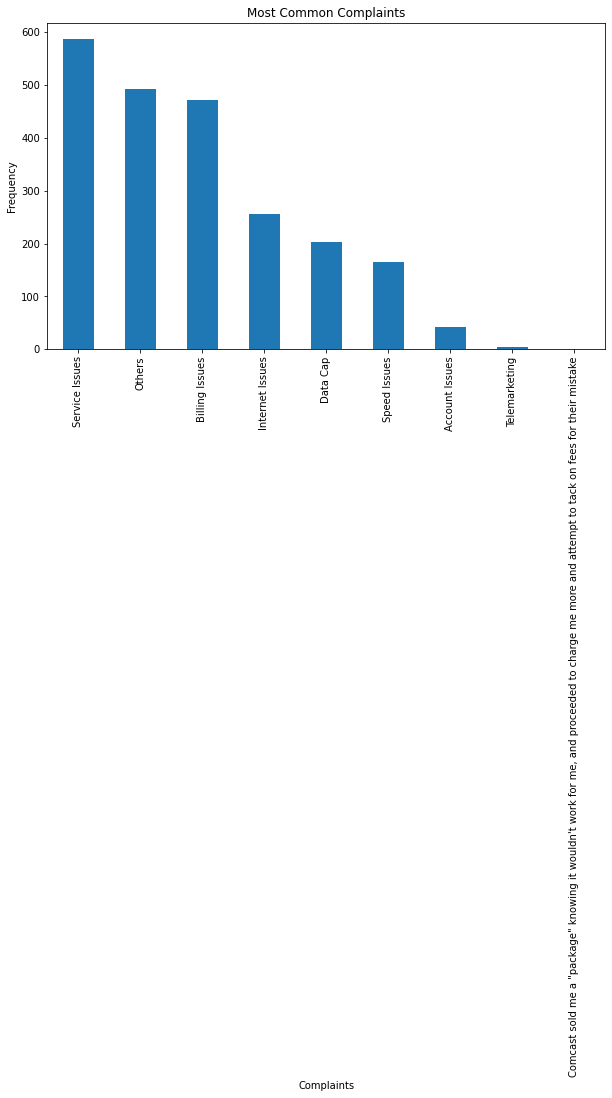

In [24]:
(comcast['Customer Complaint'].value_counts()).plot(kind='bar',figsize=(10,6),title = 'Most Common Complaints')
plt.xlabel('Complaints')
plt.ylabel('Frequency')
plt.show()

### Service Issues seem to be the most

## Task 4 : Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [25]:
comcast['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [26]:
comcast['Status'] = ['Open' if Status=='Open' or Status=='Pending' else 'Closed' for Status in comcast['Status']]
comcast['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

## Task 5 : Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 

In [27]:
comcast['State'].value_counts().count()

43

In [28]:
state_complaints = comcast.groupby(["State","Status"]).size().unstack().fillna(0)
state_complaints

Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


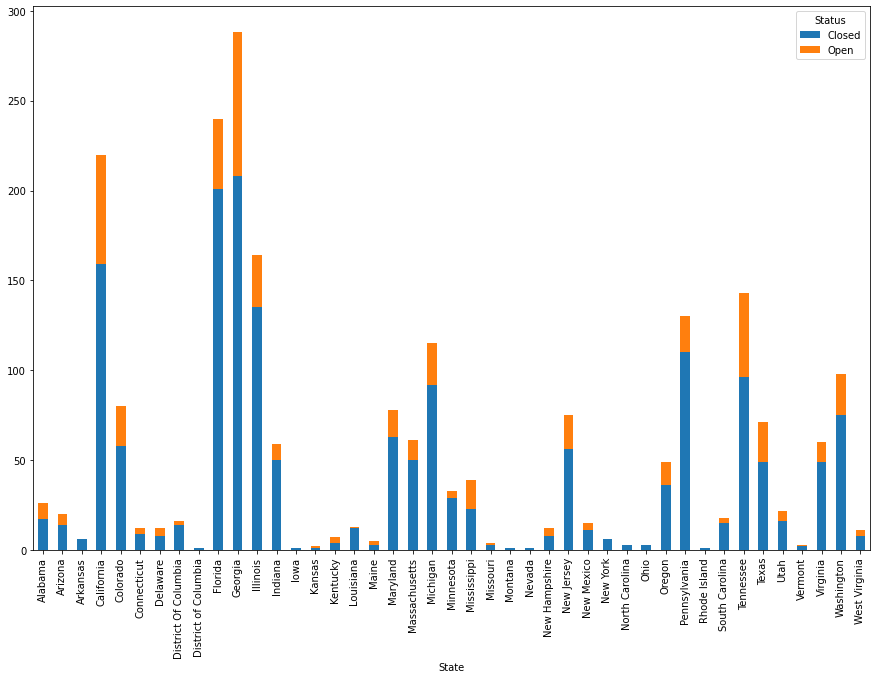

In [29]:
state_complaints.plot(kind="bar",figsize=(15,10),stacked=True)
plt.show()

### Subtask 1 : Which state has the maximum complaints

In [30]:
comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()

State    West Virginia
Count              288
dtype: object

In [31]:
comcast.groupby(["State"]).size().sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

# According to the chart above, the state of Georgia seems to have the maximum complaints

### Subtask 2 : Which state has the highest percentage of unresolved complaints

In [32]:
comcast.groupby(["State","Status"]).size().unstack().fillna(0).max()

Status
Closed    208.0
Open       80.0
dtype: float64

# According to the chart above, the state of Georgia seems to have the highest percentage of unresolved complaints

## Task 6 : Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [33]:
comcast_resolved = comcast[comcast['Status']=='Closed']
comcast_resolved.shape

(1707, 14)

In [34]:
comcast_resolved['Received Via'].value_counts()

Customer Care Call    864
Internet              843
Name: Received Via, dtype: int64

In [35]:
comcast_resolved['Received Via'].value_counts()*100/comcast_resolved['Received Via'].count()

Customer Care Call    50.615114
Internet              49.384886
Name: Received Via, dtype: float64

# 50.61% of the complaints resolved till date were received through customer care calls and 49.38% of the complaints were received through the internet

# ---X---